# Models and visualisations

In [319]:
import numpy as np
import cPickle as cp
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.patches as mpatches

**Loading the training data**

In [7]:
with open('/home/nishant/Desktop/MLmania_pucho/train.p', 'rb') as f:
    [xtrain,ytrain]=cp.load(f)

In [18]:
xtrain=np.array(xtrain)
print xtrain.shape,ytrain.shape

(55869, 17) (55869,)


**A look at the training data**

In [311]:
categories=['wins','seed','whr','wht','rec','trophies','app','fg','to','fg3','rb','stl','assist','tp','pc','sos','location']
train=pd.DataFrame(xtrain,columns=categories)
train['result']=ytrain
train.head(10)

,wins,seed,whr,wht,rec,trophies,app,fg,to,fg3,rb,stl,assist,tp,pc,sos,location,result
0,-7.0,9.0,-34.0,-7.0,-0.25,0.0,-6.0,-1.23,1.49,-1.11,1.44,-0.32,-2.06,-1.88,4.83,-2.71,0.0,1.0
1,1.0,-4.0,60.0,16.0,0.09,1.0,7.0,2.96,-0.17,-1.76,0.24,0.93,-1.65,5.58,4.07,4.52,0.0,0.0
2,8.0,-22.0,-13.0,-10.0,0.00,-1.0,-3.0,2.38,-2.46,-0.88,-1.59,-1.50,3.25,6.19,-2.42,0.72,0.0,1.0
3,1.0,0.0,-45.0,0.0,0.33,0.0,7.0,-0.03,-2.36,0.78,-0.96,-0.00,-0.07,-0.18,-3.42,0.12,0.0,0.0
4,3.0,-24.0,37.0,9.0,0.08,0.0,12.0,-0.52,1.87,-0.84,3.37,-1.24,-3.43,-0.33,-4.51,0.23,0.0,1.0
5,-5.0,20.0,-108.0,-6.0,-0.34,0.0,-16.0,-1.13,6.51,-1.55,-0.93,0.72,1.48,-0.75,7.59,-14.90,1.0,0.0
6,8.0,-11.0,264.0,1.0,0.25,0.0,5.0,3.02,0.27,-2.66,1.63,-2.67,1.95,5.83,-3.67,12.08,1.0,1.0
7,1.0,0.0,8.0,0.0,0.17,0.0,8.0,0.42,-2.39,2.38,2.66,-0.08,-2.18,-0.54,0.11,2.48,0.0,0.0
8,-2.0,0.0,-196.0,-2.0,0.09,0.0,-1.0,2.25,-0.60,0.58,3.94,2.00,-1.31,3.44,4.24,-2.85,0.0,1.0
9,-5.0,20.0,-55.0,-6.0,-0.50,0.0,-15.0,-0.68,6.48,0.05,2.69,0.64,-0.63,-1.11,11.12,-12.54,1.0,0.0


**Train test split 1/3rd test set**

In [89]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.33,random_state=7)

In [90]:
print len(x_train[1])

17


**defining different models we'll try**

In [242]:
model = GradientBoostingRegressor(learning_rate=0.06,n_estimators=200,max_features=8)
model1=RandomForestClassifier(n_estimators=200)
model2=LogisticRegression(n_jobs=8)
model3 = KNeighborsClassifier(n_neighbors=101)
model4 = AdaBoostClassifier(n_estimators=100)
xgmodel=XGBClassifier()
#ensemble=VotingClassifier(estimators=[('gbm',model),('rf',model1),
                                     # ('lr',model2),('knn',model3),('ada',model4),('xgb',xgmodel)],voting='hard')

**Accuracies of different models,we can see the gradient boosting outperformed every model with 75.65% accuracy**

In [243]:
totals=[]
accuracy=[]
for i in range(1):
    res = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    pred=map(lambda x:0 if x<0.5 else 1,pred)
    print 'gbm accuracy: %.2f%%'%(accuracy_score(pred,y_test)*100)
    #print 'gbm accuracy: %0.2f%%',model.score(x_test,y_test)
    res1 = model1.fit(x_train, y_train)
    pred1 = model1.predict(x_test)
    print 'rf accuracy: %.2f%%' %(model1.score(x_test,y_test)*100)
    res2 = model2.fit(x_train, y_train)
    pred2 = model2.predict(x_test)
    print 'lr accuracy: %0.2f%%'%(model2.score(x_test,y_test)*100)
    res3 = model3.fit(x_train, y_train)
    pred3 = model3.predict(x_test)
    print 'knn accuracy: %0.2f%%'%(model3.score(x_test,y_test)*100)
    res4 = model4.fit(x_train, y_train)
    pred4 = model4.predict(x_test)
    print 'adaboost accuracy: %0.2f%%'%(model4.score(x_test,y_test)*100)
    xgres = xgmodel.fit(x_train, y_train)
    xgpred = xgmodel.predict(x_test)
    print 'xgb accuracy: %0.2f%%'%(xgmodel.score(x_test,y_test)*100)
    preds = (pred+pred1 + pred2 + pred3 + pred4 + xgpred)/6
    totals.append(preds)
    preds=map(lambda x:0 if x<0.5 else 1,preds)
    accuracy.append(np.mean(preds == y_test))
print "The accuracy is: %.2f%%" %(sum(accuracy)/len(accuracy)*100)

gbm accuracy: 75.65%
rf accuracy: 72.44%
lr accuracy: 75.23%
knn accuracy: 74.44%
adaboost accuracy: 74.99%
xgb accuracy: 75.45%
The accuracy is: 75.37%


In [206]:
print model.max_features

7


#### Visualising feature importances,naturally number of wins are most important followed by strength of schedule.

['wins', 'sos', 'location', 'pc', 'tp', 'to', 'rb', 'whr', 'seed', 'app', 'stl', 'fg', 'fg3', 'wht', 'assist', 'rec', 'trophies']


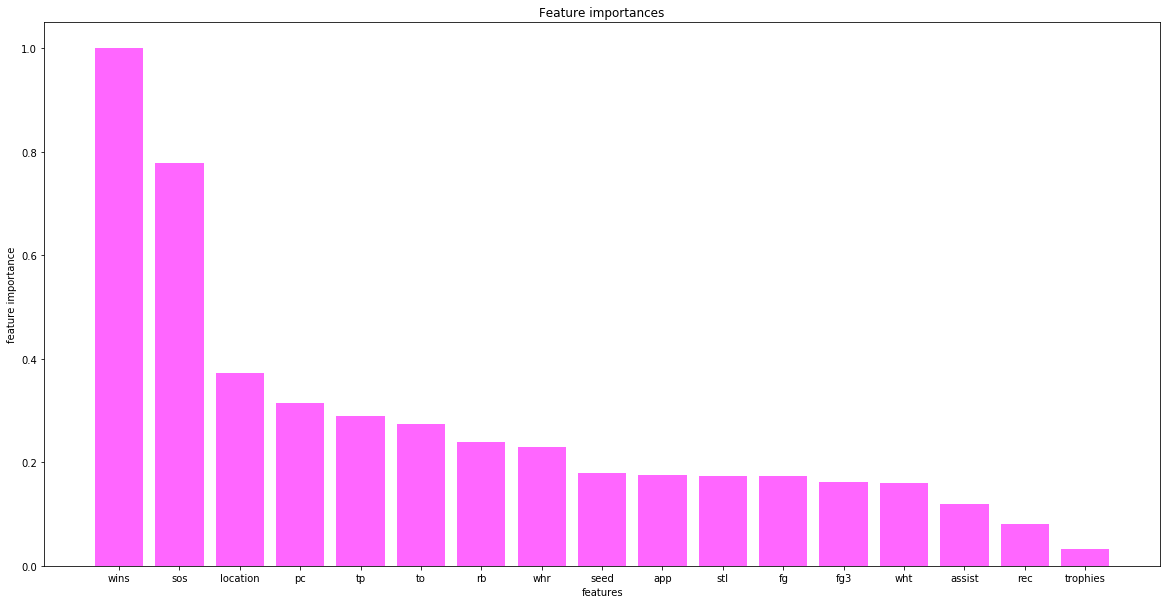

In [315]:
imp1=model.feature_importances_
imp1=list(imp1/max(imp1))
ind=[i[0] for i in sorted(enumerate(imp1), key=lambda x:x[1])]
imp=(sorted(imp1))
feat=[categories[x] for x in ind]
print feat[::-1]
fig, ax = plt.subplots(figsize=(20,10))
l=range(0,17)
ax.bar(l, imp[::-1], facecolor=(1, 0,1), alpha=0.6)
plt.xticks(np.arange(0, 17, 1))
ax.set_xticklabels(feat[::-1])
ax.set_ylabel('feature importance')
ax.set_xlabel('features')
ax.set_title('Feature importances')
plt.show(ax)


**persisting the model for later use**

In [245]:
cp.dump(model,open('/home/nishant/Desktop/model.pkl','wb'))

## Neural Network
#### that's right,tried the neural network too using keras,built a simple 2 hidden layer MLP,accuracy obtained was less than GBM and took more time

In [91]:
seed = 7
np.random.seed(seed)

In [92]:
number_of_class=2   #number of classes
dim_h1=64            #num of neuron in hidden layer1
dim_h2=16            #num of neuron in hidden layer2

In [111]:
def baseline_model():
   
    model = Sequential()
    model.add(Dense(dim_h1,activation='relu',kernel_initializer="normal",input_dim=17))
      #    model.add(Dropout(0.5))
    model.add(Dense(dim_h2,kernel_initializer="normal",activation='relu'))
     #    model.add(Dropout(0.5))
    model.add(Dense(number_of_class,kernel_initializer="normal",activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [164]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=500, verbose=0)

**cross-validation score**

In [114]:
#Evaluate The Model with k-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator,x_train,y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 75.22% (0.62%)


**Accuracy**

In [165]:
estimator.fit(x_train, y_train)
print "Accuracy: {}%\n".format(estimator.score(x_test, y_test) *100)

Accuracy: 75.3972998797%



### Area under curve(auc)
**And visualisation of predicted and actual win percentages**

('AUC:', 0.83850000000000002)


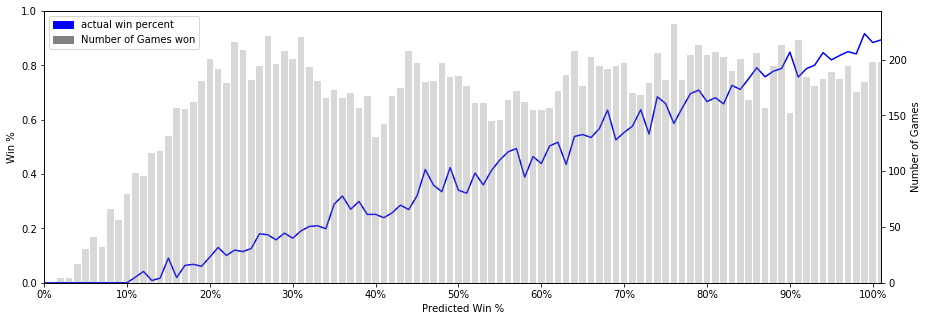

In [336]:
predTestComp = pd.DataFrame({'pred' : model.predict(x_test),
                             'Win': y_test})
predTestComp['predRound'] = np.round(predTestComp['pred'], decimals=2) 
#AUC
    
y = np.array(predTestComp['Win']+1)
pred = np.array(predTestComp['pred'])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
auc = np.round(metrics.auc(fpr, tpr),decimals=4)
print('AUC:', auc)

grouped = predTestComp.groupby(['predRound'])['Win'].agg(['count', 'mean']).reset_index()

fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax2.bar(grouped.index, grouped['count'], facecolor=(0.5, 0.5, 0.5), alpha=0.3) 
ax1.plot(grouped.index, grouped['mean'], color = 'b')
ax2.set_ylabel('Number of Games')
#ax2.xaxis.tick_top()
ax1.set_ylabel('Win %')
ax1.set_xlabel('Predicted Win %')
ax1.set_xlim([0, 101])
ax1.set_ylim([0, 1])
plt.xticks(np.arange(0, 101, 10))
listx = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
listy = ['0%', '20%', '40%', '60%', '80%', '100%']
ax1.set_xticklabels(listx)
line_patch = mpatches.Patch(color='blue', label='actual win percent')
bar_patch = mpatches.Patch(color='gray', label='Number of Games won')
plt.legend(handles=[line_patch, bar_patch], loc = 'upper left')
plt.show(ax1)
plt.show(ax2)

## Never Mind this ,just some hyperparameter tuning for our final model,the gradient boosting regressor

In [239]:
clf=GradientBoostingRegressor(n_estimators=200,max_features=8)
lr=[0.05,0.055,0.06,0.075,0.08,0.09,0.1,0.125,0.15,0.2]
ne=[100,150,200,400,500,1000]
for n in ne:
    for l in lr:
        clf.learning_rate=l
        clf.n_estimators=n
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        pred=map(lambda x:0 if x<0.5 else 1,pred)
        print 'gbm accuracy for lr %.2f and ne %d: %.2f%%'%(l,n,accuracy_score(pred,y_test)*100)

gbm accuracy for lr 0.05 and ne 100: 75.50%
gbm accuracy for lr 0.06 and ne 100: 75.67%
gbm accuracy for lr 0.06 and ne 100: 75.54%
gbm accuracy for lr 0.07 and ne 100: 75.39%
gbm accuracy for lr 0.08 and ne 100: 75.52%
gbm accuracy for lr 0.09 and ne 100: 75.73%
gbm accuracy for lr 0.10 and ne 100: 75.41%
gbm accuracy for lr 0.12 and ne 100: 75.52%
gbm accuracy for lr 0.15 and ne 100: 75.56%
gbm accuracy for lr 0.20 and ne 100: 75.54%
gbm accuracy for lr 0.05 and ne 150: 75.62%
gbm accuracy for lr 0.06 and ne 150: 75.49%
gbm accuracy for lr 0.06 and ne 150: 75.47%
gbm accuracy for lr 0.07 and ne 150: 75.53%
gbm accuracy for lr 0.08 and ne 150: 75.55%
gbm accuracy for lr 0.09 and ne 150: 75.54%
gbm accuracy for lr 0.10 and ne 150: 75.57%
gbm accuracy for lr 0.12 and ne 150: 75.43%
gbm accuracy for lr 0.15 and ne 150: 75.54%
gbm accuracy for lr 0.20 and ne 150: 75.50%
gbm accuracy for lr 0.05 and ne 200: 75.53%
gbm accuracy for lr 0.06 and ne 200: 75.71%
gbm accuracy for lr 0.06 and ne 